In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Naive Bayes

In [12]:
data = pd.read_csv('prev-labs/lab3/titanic.csv')
# removing name column
data = data.drop(['name'], axis = 1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,0,1,female,2.00,1,2,151.5500,S
3,0,1,male,30.00,1,2,151.5500,S
4,0,1,female,25.00,1,2,151.5500,S


In [13]:
# split data
x_train, x_test, y_train, y_test = train_test_split(data.loc[:, 'pclass':], data['survived'],
                                                    test_size=0.2, stratify=data['survived'])

## Data preprocessing
NB can handle discrete features data which can be useful with categorical data.

Let's see one of the advantages of NB classifier. NB is not affected by data scaling

In [14]:
# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
scaled_x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

/home/yy7/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/yy7/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Train and test two NB models on the data before scaling and one after scaling 
and observe if the accuracy change with scaling

In [15]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Write code here
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print('Accuracy before scaling:', accuracy_score(y_test, y_pred))

# Write code here
nb = MultinomialNB()
nb.fit(scaled_x_train, y_train)
y_pred = nb.predict(scaled_x_test)
print('Accuracy after scaling:', accuracy_score(y_test, y_pred))

Accuracy before scaling: 0.7786259541984732
Accuracy after scaling: 0.6603053435114504


# Regularization
What is [Elastic-Net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)?
How can you specify the contribution of each part using l1 ration

Apply classification on the breast cancer dataset with no regularization, l1,
l2, and elastic-net.

### Loading Breast cancer dataset

In [16]:
X, y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Fitting both Lasso and Ridge

Fit 3 models: Lasso and Ridge and Elastic-Net.
Then print their accuracy and coefficients and notice the difference.

In [20]:
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet

# Write code here
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test).astype(int)
print(f"Lasso: {accuracy_score(y_test, y_pred)}, {lasso.coef_}")

ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test).astype(int)
print(f"Ridge: {accuracy_score(y_test, y_pred)}, {ridge.coef_}")

elasticnet = ElasticNet()
elasticnet.fit(x_train, y_train)
y_pred = elasticnet.predict(x_test).astype(int)
print(f"ElasticNet: {accuracy_score(y_test, y_pred)}, {elasticnet.coef_}")


Lasso: 0.4444444444444444, [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.38172126e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -5.56784681e-05 -4.84280802e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]
Ridge: 0.5789473684210527, [ 0.17447188  0.00153045 -0.00513055 -0.00128325 -0.11818432 -0.01683136
 -0.13128865 -0.22476034 -0.15232779 -0.00792515 -0.12750205  0.02721072
 -0.04046861  0.00138772 -0.0483056   0.0575303   0.15943928 -0.03971724
 -0.02204321  0.0055686  -0.26742486 -0.01464427  0.00942734  0.00125219
 -0.27686671 -0.11419131 -0.21257358 -0.45126176 -0.31185673 -0.06081197]
ElasticNet: 0.5029239766081871, [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.0000000

# KNN
Compare KNN vs logistic regression

---
In ML images can be flattened to 1D vector of pixels, then we can train our
models on them considering each pixel as a feature.

Dataset shape (1797, 8, 8)


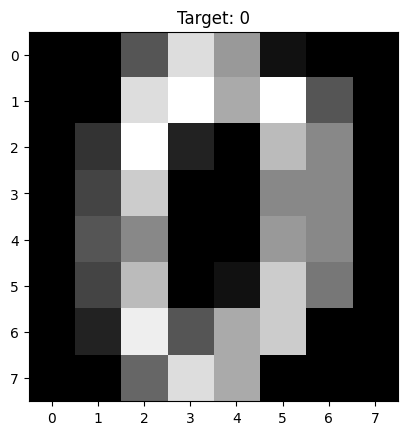

Now we have 1797 images flattened to 64-values vectors


In [21]:
# Based on https://github.com/hsu-ai-course/hsu.ai/blob/master/code/12.%20kNN%20and%20ANN%20for%20MNIST.ipynb
digits = load_digits()

print("Dataset shape", digits.images.shape)

# show first image
plt.title(f"Target: {digits.target[0]}")
plt.imshow(digits.images[0], cmap='gray')
plt.show()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target
print("Now we have {} images flattened to {}-values vectors".format(*X.shape))

In [22]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Train a KNN and LR models and compare their results

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Write code here
knn = KNeighborsClassifier()
LR = LogisticRegression()

knn.fit(X_train, y_train)
LR.fit(X_train, y_train)

y_true, y_pred = y_test, knn.predict(X_test)
print('KNN', classification_report(y_true, y_pred))

y_true, y_pred = y_test, LR.predict(X_test)
print('LR', classification_report(y_true, y_pred))

KNN               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       1.00      0.97      0.99        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.90      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360

LR               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.97      0.94        35
           2       0.97      0.97      0.97        36
           3     

/home/yy7/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Which model performed better? What is the advantages of each model over the other?

What is the output of `classification_report` function? How to interpret it?